In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv("test.csv",sep=',')

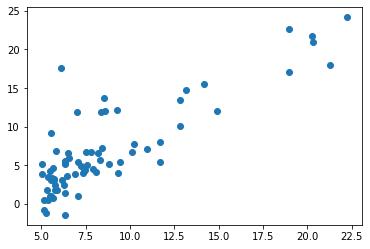

In [48]:

# data.plot(kind='scatter', x='Population', y='Profit')

In [49]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]
x.insert(0,'Ones',1)
x = np.matrix(x)
y = np.matrix(y)
theta=np.matrix(np.array([0,0]))

In [50]:
def compute(x,y,theta):
    inner = np.power((x*theta.T)-y,2)
    return np.sum(inner)/(2*len(x))

In [51]:
def gradientDescent(x,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (x*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,x[:,j])
            temp[0,j] = theta[0,j] - alpha*np.sum(term)/len(x)
        theta = temp
        cost[i] = compute(x,y,theta)
        return theta,cost

In [52]:
g,cost = gradientDescent(x,y,theta,0.01,1500)
g = np.array(g)
g

array([[0.068253  , 0.79456118]])

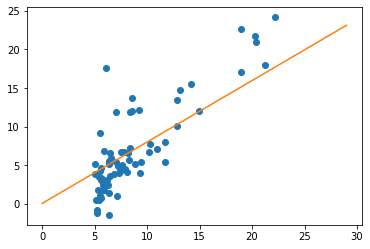

In [55]:

x = np.arange(0,30)
y = g[:,1]*x+g[:,0]
plt.plot("Population","Profit","o",data=data)
plt.plot(x,y)